In [1]:
import numpy as np
import tensorflow as tf
import classifier, training
tf.enable_eager_execution()

# Data preprocessing

First let's load the MNIST dataset of hand-written digits from `tensorflow`.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Next let's encode the data using the feature map $\Phi (p) = (p, 1-p)^T$ and transform the labels to one-hot format.

In [3]:
def data_encoder(data):
  return np.array([1 - data, data]).transpose([1, 2, 0])

def to_one_hot(labels, n_labels=10):
  one_hot = np.zeros((len(labels), n_labels))
  one_hot[np.arange(len(labels)), labels] = 1
  return one_hot

n_labels = len(np.unique(y_train))

# Flatten and normalize
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) / 255.0
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) / 255.0
# Encode
x_train = data_encoder(x_train)
x_test = data_encoder(x_test)
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

print(n_labels)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

10
(60000, 784, 2) (60000, 10)
(10000, 784, 2) (10000, 10)


# Define MPS classifier

Note that our MPS has one more site than the data because of the label tensor. We also have to set the bond dimension which is a hyperparameter and remains constant during training. In a more sophisticated implementation the bond dimension can be adaptively changed according to the complexity of training data by performing some SVD steps. This is currently not implemented but can be added in a future version.

In [4]:
mps10 = classifier.MatrixProductState(n_sites=x_train.shape[1] + 1,
                                    n_labels=n_labels,
                                    d_phys=x_train.shape[2],
                                    d_bond=10)
mps20 = classifier.MatrixProductState(n_sites=x_train.shape[1] + 1,
                                    n_labels=n_labels,
                                    d_phys=x_train.shape[2],
                                    d_bond=20)
mps50 = classifier.MatrixProductState(n_sites=x_train.shape[1] + 1,
                                    n_labels=n_labels,
                                    d_phys=x_train.shape[2],
                                    d_bond=50)

# Example training

We can train the `mps` object we created using the `training.fit` data. Here we perform a quick training in a small portion of the data without validation.

In [5]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)

mps10, history = training.fit(mps10, optimizer, x_train[:1000], y_train[:1000],
                            n_epochs=10, batch_size=50, n_message=1)


Epoch: 0
Time: 3.3835930824279785
Loss: 2.2813007831573486
Accuracy: 0.116

Epoch: 1
Time: 6.667639255523682
Loss: 1.6160660982131958
Accuracy: 0.43

Epoch: 2
Time: 9.945064067840576
Loss: 0.9859989285469055
Accuracy: 0.688

Epoch: 3
Time: 13.228430986404419
Loss: 0.713521420955658
Accuracy: 0.776

Epoch: 4
Time: 16.50135612487793
Loss: 0.5561362504959106
Accuracy: 0.831

Epoch: 5
Time: 19.809200763702393
Loss: 0.4400608539581299
Accuracy: 0.875

Epoch: 6
Time: 23.124213218688965
Loss: 0.3686707615852356
Accuracy: 0.893

Epoch: 7
Time: 26.38359570503235
Loss: 0.33924129605293274
Accuracy: 0.902

Epoch: 8
Time: 29.826070547103882
Loss: 0.32387495040893555
Accuracy: 0.916

Epoch: 9
Time: 33.286932945251465
Loss: 0.28660666942596436
Accuracy: 0.919


In [6]:
mps20, history20 = training.fit(mps20, optimizer, x_train[:1000], y_train[:1000],
                            n_epochs=10, batch_size=50, n_message=1)


Epoch: 0
Time: 11.214986085891724
Loss: 2.214038848876953
Accuracy: 0.17

Epoch: 1
Time: 21.786638498306274
Loss: 1.496695876121521
Accuracy: 0.514

Epoch: 2
Time: 32.35658359527588
Loss: 0.7375344038009644
Accuracy: 0.763

Epoch: 3
Time: 43.8205349445343
Loss: 0.45229098200798035
Accuracy: 0.861

Epoch: 4
Time: 54.757938385009766
Loss: 0.3072621524333954
Accuracy: 0.911

Epoch: 5
Time: 67.86824154853821
Loss: 0.21335671842098236
Accuracy: 0.929

Epoch: 6
Time: 82.98875880241394
Loss: 0.2144099622964859
Accuracy: 0.936

Epoch: 7
Time: 95.29872441291809
Loss: 0.2014651894569397
Accuracy: 0.928

Epoch: 8
Time: 107.4794774055481
Loss: 0.1720908135175705
Accuracy: 0.942

Epoch: 9
Time: 118.89829683303833
Loss: 0.1568392664194107
Accuracy: 0.947


In [7]:
mps50, history50 = training.fit(mps50, optimizer, x_train[:1000], y_train[:1000],
                            n_epochs=10, batch_size=50, n_message=1)


Epoch: 0
Time: 67.68969917297363
Loss: 3.0257692337036133
Accuracy: 0.125

Epoch: 1
Time: 135.802659034729
Loss: 2.271416425704956
Accuracy: 0.104

Epoch: 2
Time: 204.3313910961151
Loss: 1.729012131690979
Accuracy: 0.416

Epoch: 3
Time: 270.0918095111847
Loss: 0.8957529067993164
Accuracy: 0.727

Epoch: 4
Time: 337.22472286224365
Loss: 0.5402019023895264
Accuracy: 0.837

Epoch: 5
Time: 402.27513909339905
Loss: 0.3833809196949005
Accuracy: 0.894

Epoch: 6
Time: 469.36961340904236
Loss: 0.27588188648223877
Accuracy: 0.905

Epoch: 7
Time: 537.8736934661865
Loss: 0.25605666637420654
Accuracy: 0.914

Epoch: 8
Time: 603.8041079044342
Loss: 0.21179479360580444
Accuracy: 0.93

Epoch: 9
Time: 669.2888622283936
Loss: 0.16677524149417877
Accuracy: 0.938


In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy
import matplotlib.font_manager as font_manager

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

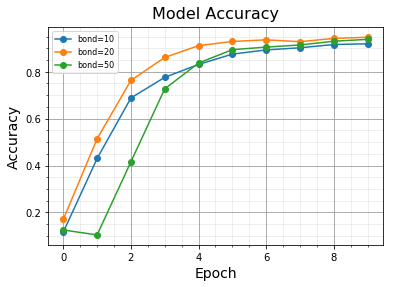

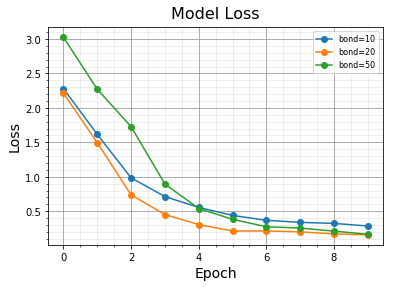

In [49]:
#========================================= Accuracy ==========================================================#
#=============================================================================================================#
# summarize history for accuracy
plt.plot(history['acc'],marker='o')
plt.plot(history20['acc'],marker='o')
plt.plot(history50['acc'],marker='o')
plt.title('Model Accuracy',title_font)
plt.ylabel('Accuracy',**axis_font)
plt.xlabel('Epoch',**axis_font)
plt.tick_params(axis="x", labelsize=10)
plt.tick_params(axis="y", labelsize=10)
plt.legend(['bond=10', 'bond=20','bond=50'], loc='best')
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

#============================================= Loss ==========================================================#
#=============================================================================================================#
# summarize history for loss
plt.plot(history['loss'],marker='o')
plt.plot(history20['loss'],marker='o')
plt.plot(history50['loss'],marker='o')
plt.plot(history['val_loss'])
plt.title('Model Loss',**title_font)
plt.ylabel('Loss',**axis_font)
plt.xlabel('Epoch',**axis_font)
plt.tick_params(axis="x", labelsize=10)
plt.tick_params(axis="y", labelsize=10)
plt.legend(['bond=10', 'bond=20','bond=50'], loc='best')
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()